In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import prepare

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, explained_variance_score

# Drug Deaths
## Individual Project- Regression
### Natasha Rivers
#### July 14, 2021

<hr style="border:2px solid black"> </hr>

## Acquire

In [2]:
df = pd.read_csv('drug_deaths.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

### Takeaways from Acquire:
- imported the csv into Pandas and created a dataframe
- original dataframe contains:
    - 41 columns 
        - multiple data types
    - 5105 entries
- will likely need to:
    - drop some columns
    - rename columns
    - change data types
- dummies already appear to have been created
- contains many nulls

<hr style="border:2px solid black"> </hr>

## Prepare

In [5]:
df.shape

(5105, 42)

In [6]:
# replace nan values (resulting in no loss of entries)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [7]:
df.shape

(5105, 42)

In [8]:
#check for nulls
df.isnull().sum()

Unnamed: 0                0
ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
Fentanyl_Analogue         0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other               

In [9]:
df = df.drop(columns=['Unnamed: 0', 'ResidenceCounty','ResidenceState', 'DeathCounty', 'InjuryCounty','InjuryState', 'ResidenceCityGeo', 'InjuryCityGeo', 'Other', 'OtherSignifican', 'LocationifOther', 'DeathCityGeo', 'InjuryCity'])  

In [10]:
df.isnull().sum()

ID                       0
Date                     2
DateType                 2
Age                      3
Sex                      6
Race                    13
ResidenceCity          173
DeathCity                5
Location                24
DescriptionofInjury    780
InjuryPlace             66
COD                      0
Heroin                   0
Cocaine                  0
Fentanyl                 0
Fentanyl_Analogue        0
Oxycodone                0
Oxymorphone              0
Ethanol                  0
Hydrocodone              0
Benzodiazepine           0
Methadone                0
Amphet                   0
Tramad                   0
Morphine_NotHeroin       0
Hydromorphone            0
OpiateNOS                0
AnyOpioid                0
MannerofDeath           10
dtype: int64

In [11]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,1,1,0,0,0,0,0,0,0,Accident
1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,Substance Abuse,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,GREENWICH,Hospital,substance abuse,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,Transdermal Absorption,...,0,0,0,0,0,0,0,0,0,Accident


In [12]:
df.shape

(5105, 29)

In [13]:
#deal with null values left
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    ''' 
    take in a dataframe and a proportion for columns and rows
    return dataframe with columns and rows not meeting proportions dropped
    '''
    # calc column threshold
    col_thresh = int(round(prop_required_column*df.shape[0],0)) 
    # drop columns with non-nulls less than threshold
    df.dropna(axis=1, thresh=col_thresh, inplace=True) 
    # calc row threshhold
    row_thresh = int(round(prop_required_row*df.shape[1],0))  
    # drop columns with non-nulls less than threshold
    df.dropna(axis=0, thresh=row_thresh, inplace=True) 
    
    return df 

In [14]:
from sklearn.impute import SimpleImputer

def impute(df, my_strategy, column_list):
    ''' 
    take in a df strategy and cloumn list
    return df with listed columns imputed using input stratagy
    '''
    #create imputer   
    imputer = SimpleImputer(strategy=my_strategy)
    #fit/transform selected columns
    df[column_list] = imputer.fit_transform(df[column_list])

    return df

In [15]:
#drop using threshold
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .5)

#impute with mean for numeric column
df = impute(df, 'mean', ['Age'])

#imputing with most frequent value for descrete columns
df = impute(df, 'most_frequent', ['Date', 'DateType', 'Sex', 'Race','ResidenceCity', 'DeathCity', 'Location', 'DescriptionofInjury', 'InjuryPlace', 'MannerofDeath']) 

In [16]:
#confirm all nulls gone
df.isnull().sum()

ID                     0
Date                   0
DateType               0
Age                    0
Sex                    0
Race                   0
ResidenceCity          0
DeathCity              0
Location               0
DescriptionofInjury    0
InjuryPlace            0
COD                    0
Heroin                 0
Cocaine                0
Fentanyl               0
Fentanyl_Analogue      0
Oxycodone              0
Oxymorphone            0
Ethanol                0
Hydrocodone            0
Benzodiazepine         0
Methadone              0
Amphet                 0
Tramad                 0
Morphine_NotHeroin     0
Hydromorphone          0
OpiateNOS              0
AnyOpioid              0
MannerofDeath          0
dtype: int64

In [17]:
df.Race.value_counts()

White                     4017
Hispanic, White            561
Black                      433
Hispanic, Black             24
Unknown                     23
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

In [18]:
#need to change 'accident' to be be uniform
df.MannerofDeath.value_counts()

Accident    5076
Pending       14
accident      13
Natural        1
ACCIDENT       1
Name: MannerofDeath, dtype: int64

In [19]:
#change ACCIDENT to Accident for uniformity
df = df.replace({'MannerofDeath': 'ACCIDENT'}, {'MannerofDeath': 'Accident'})

In [20]:
#change accident to Accident for uniformity
df = df.replace({'MannerofDeath': 'accident'}, {'MannerofDeath': 'Accident'})

In [21]:
#take a look, make sure it worked
df.MannerofDeath.value_counts()

Accident    5090
Pending       14
Natural        1
Name: MannerofDeath, dtype: int64

In [22]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,14-0273,06/28/2014 12:00:00 AM,1.0,41.964916,Male,White,HARTFORD,HARTFORD,Residence,substance,...,1,1,0,0,0,0,0,0,0,Accident
1,13-0102,03/21/2013 12:00:00 AM,0.0,48.000000,Male,Black,NORWALK,NORWALK,Hospital,Substance Abuse,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.000000,Female,White,SANDY HOOK,DANBURY,Hospital,Substance Abuse,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,03/31/2016 12:00:00 AM,0.0,23.000000,Male,White,RYE,GREENWICH,Hospital,substance abuse,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,02/13/2013 12:00:00 AM,0.0,22.000000,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,Transdermal Absorption,...,0,0,0,0,0,0,0,0,0,Accident


In [23]:
#change datatype
df.Age = df.Age.astype(int)

In [24]:
#change dtype of 'dt'
#check current dtype- object
df.Date.dtypes

dtype('O')

In [25]:
#change data types
df.Date = df.Date.astype('datetime64[ns]')

In [27]:
#set index and sort
df = df.set_index('Date').sort_index()

In [50]:
#see what is most correlated
corr = df.corr()
corr

,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
DateType,1.000000,0.023462,-0.029946,0.009814,0.107203,-0.058695,-0.085580,0.038350,-0.017632,0.081365,0.000283,0.040727,-0.000216,0.072412,0.044439
Age,0.023462,1.000000,-0.128856,0.045471,-0.019466,0.121200,0.028573,0.085530,0.073067,0.059161,0.061733,-0.042368,0.085369,0.043209,0.029307
Heroin,-0.029946,-0.128856,1.000000,-0.002140,-0.009908,-0.224786,-0.112995,-0.025313,-0.087231,-0.104391,-0.125301,-0.003988,-0.038304,-0.002160,-0.131226
Cocaine,0.009814,0.045471,-0.002140,1.000000,0.038905,-0.116250,-0.063032,-0.044395,-0.060304,-0.127564,-0.062315,0.004012,-0.040055,-0.021159,-0.056662
Fentanyl_Analogue,0.107203,-0.019466,-0.009908,0.038905,1.000000,-0.053041,-0.037092,0.006837,-0.024525,0.007820,-0.028285,0.025009,0.005127,-0.009571,-0.038037
Oxycodone,-0.058695,0.121200,-0.224786,-0.116250,-0.053041,1.000000,0.320290,0.005251,0.048206,0.136506,-0.040371,-0.006639,0.005926,0.034915,0.030393
Oxymorphone,-0.085580,0.028573,-0.112995,-0.063032,-0.037092,0.320290,1.000000,0.001961,-0.004497,0.066741,-0.004821,0.004986,-0.006483,0.009186,-0.009012
Ethanol,0.038350,0.085530,-0.025313,-0.044395,0.006837,0.005251,0.001961,1.000000,0.033909,-0.004199,-0.037363,-0.031072,0.003603,-0.026821,-0.012245
Hydrocodone,-0.017632,0.073067,-0.087231,-0.060304,-0.024525,0.048206,-0.004497,0.033909,1.000000,0.035401,-0.031246,-0.012571,-0.000041,0.007883,0.019690
Benzodiazepine,0.081365,0.059161,-0.104391,-0.127564,0.007820,0.136506,0.066741,-0.004199,0.035401,1.000000,0.112367,0.056782,0.038973,0.028189,0.030248


In [40]:
#split data using od_deaths_split function from prepare file
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.od_deaths_split(df, 'Race')

train -> (2858, 28)
validate -> (1226, 28)
test -> (1021, 28)


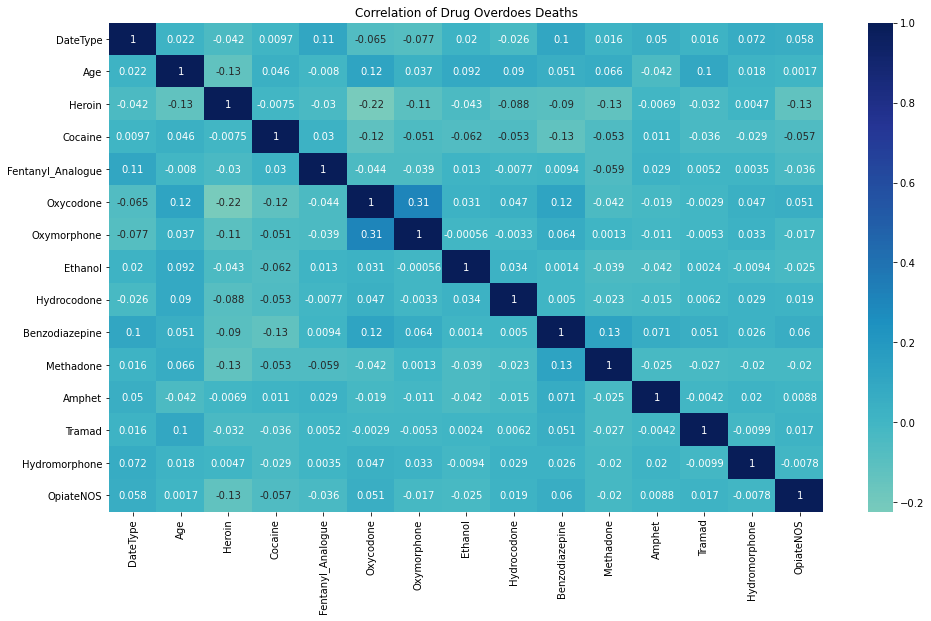

In [52]:
#heatmap to show correlation of all data
plt.figure(figsize=(16,9))

sns.heatmap(train.corr(), cmap='YlGnBu', center=0, annot=True)

plt.title('Correlation of Drug Overdoes Deaths')

plt.show()

### Takeaways from Prepare:
- dropped several columns with high null value 
    - were not significant if only had ~10% of data
- filled null values by imputing
    - using mean and most frequent
- changed data for uniformity in Manner of Death
- changed data type in Age from float to integer
- changed index to Date and datatype to DateTime64[ns]
- Split data into train, validate, test

<hr style="border:2px solid black"> </hr>

## Explore

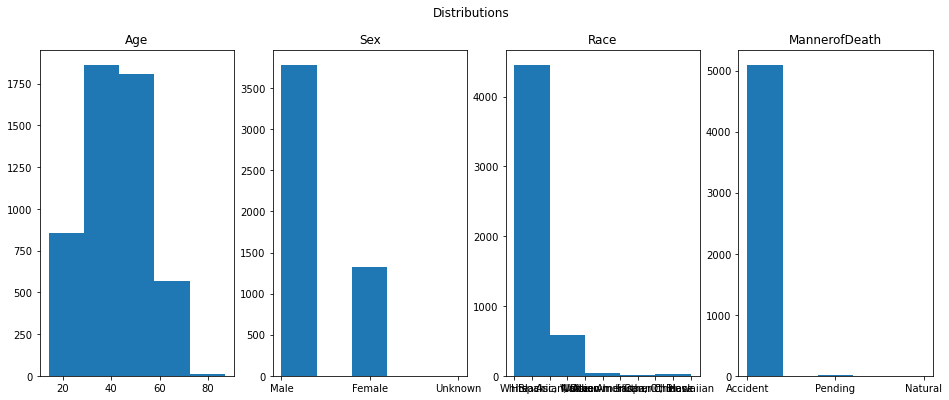

In [33]:
# Plot the distributions
plt.figure(figsize=(16, 6))

# List of columns
cols = ['Age', 'Sex', 'Race', 'MannerofDeath']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    plt.suptitle('Distributions')


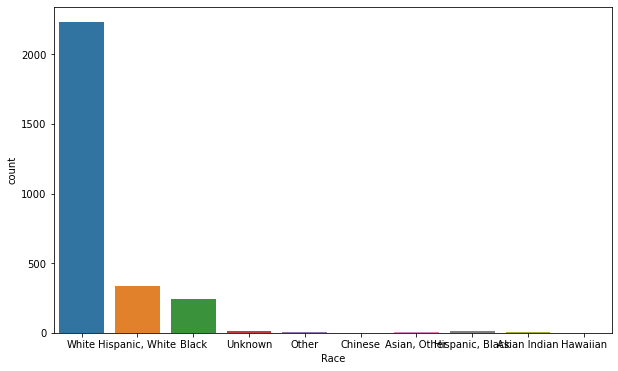

In [53]:
#visualize churn data using a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Race', data=train)
plt.show()

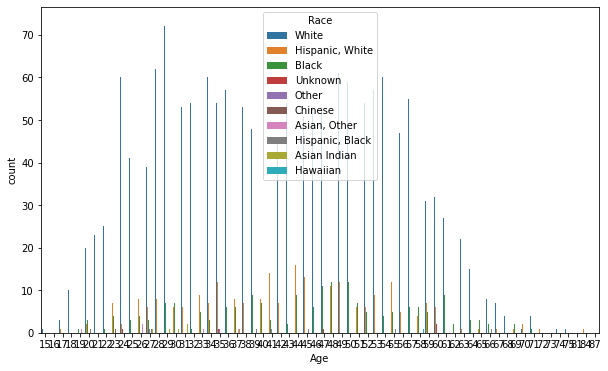

In [54]:
#this plot shows senior citizen (1) vs non-senior citizen (0)
## who churn (1) vs do not churn (0)
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Race', data=train)
plt.show()

__________________________

Hypothesis 1: T-Test (cont vs discrete)
- $H_0$: There is no relationship between Age and Race
- $H_a$: There is a relationship between Age and Race

In [ ]:
#set alpha
alpha = .05

In [42]:
# sample size, must be more then 30 to meet assumption
train.Age.count(), train.Race.count()

(2858, 2858)

In [48]:
#t-test on entire train set
t, p = stats.ttest_ind(train.Age,train.Race, equal_var=False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'